<a href="https://colab.research.google.com/github/kartik1907/ML-Projects/blob/master/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Here the analysis will be answering questions like

1) Which age Groups spends more?

2) Which Gender spends more on Purchase of goods?

3) Does the Occupation has an impact over the quantity purchased from the store?

4) Married people spends more or Single?

5) Are Local people familiar with the store and its product because of the trust they built over time ?

6) What can be the future sales considering different parameters like Occupation, Gender, Marital Status etc ?

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/Python/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/Python/test.csv')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


## Lets Check the Null Values in the Training and Testing Data

In [0]:
(train.isnull().sum())/len(train)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [0]:
(test.isnull().sum())/len(test)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.309693
Product_Category_3            0.695902
dtype: float64

## Observation : 
1.   The training as well as Testing data consists of 2 variables with null values.
2.   These variables are Product_category_2 and Product_category_3.
3.   Product_category_2 consist of around 30% to 32% of missing values while Product_category_3 contains approx 70 % of missing values.

1.   The Missing values can either be filled with mean value or can be dropped.
2.   Product_Category_3 contain 70 % of missing values which if trained can lead to training of misinformation.




## Data Exploration

### The Unique value in the data Frame is as mentioned below

In [0]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

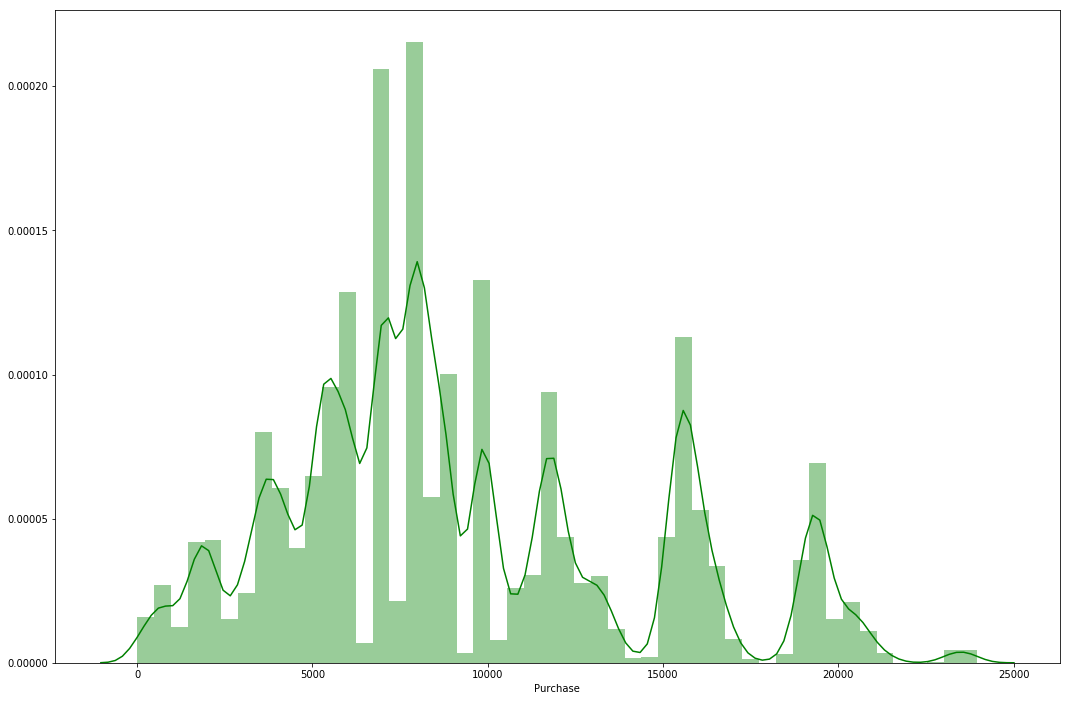

In [0]:
plt.figure(figsize=(18,12))

sns.distplot(train.Purchase,kde=True,color='green',label='Purchase Distribution Plot')

Text(0.5, 1.0, 'Time Span of clients')

<Figure size 432x288 with 0 Axes>

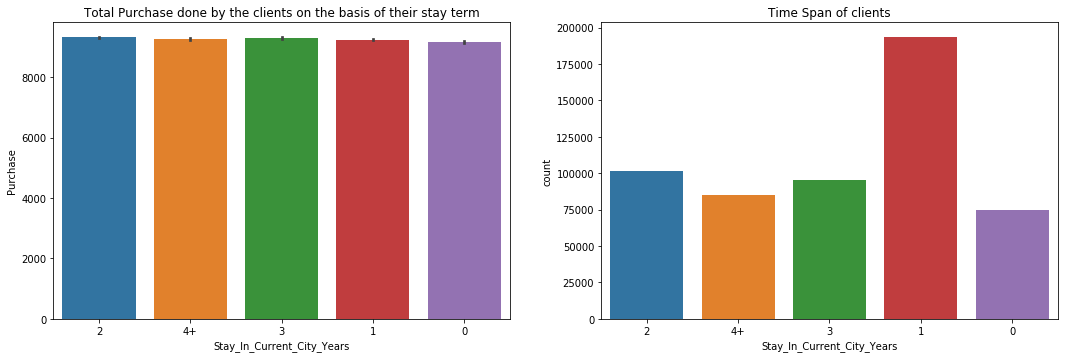

In [0]:
plt.figure(1)
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(train.Stay_In_Current_City_Years,train.Purchase)
plt.title('Total Purchase done by the clients on the basis of their stay term')

plt.subplot(222)
sns.countplot(train.Stay_In_Current_City_Years)
plt.title('Time Span of clients')


*   All the customers has almost equal contributoin in the totalpurchase of the goods

*   Wherease the number of people who stayed in the city for almost 1 years are more compare to the people who has been in the city from long.


*   We can conclude from this that the People who are very new to the city may not get attracted to the store and the one who have lived more than 1 year may have migrated towards other store.

Text(0.5, 1.0, 'Total Count of Both Genders')

<Figure size 432x288 with 0 Axes>

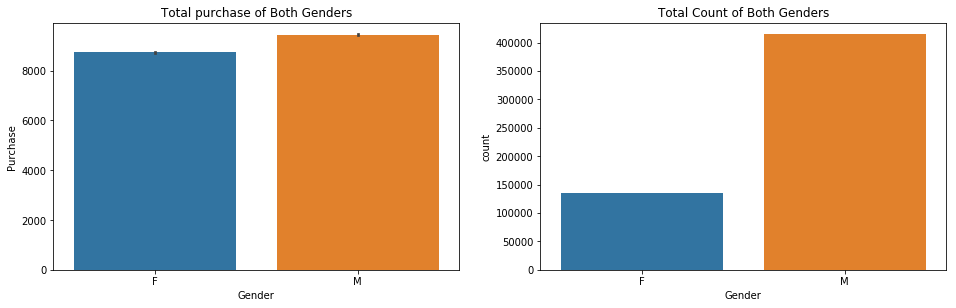

In [0]:
plt.figure(1)
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.barplot(train.Gender,train.Purchase)
plt.title('Total purchase of Both Genders')

plt.subplot(222)
sns.countplot(train.Gender)
plt.title('Total Count of Both Genders')



*   Number of Females is very less as compared to the count of males in the record.

*   But unlike Count, the contribution of Females in the purchase is very large.



Text(0.5, 1.0, 'Total Count of Product Category 2')

<Figure size 432x288 with 0 Axes>

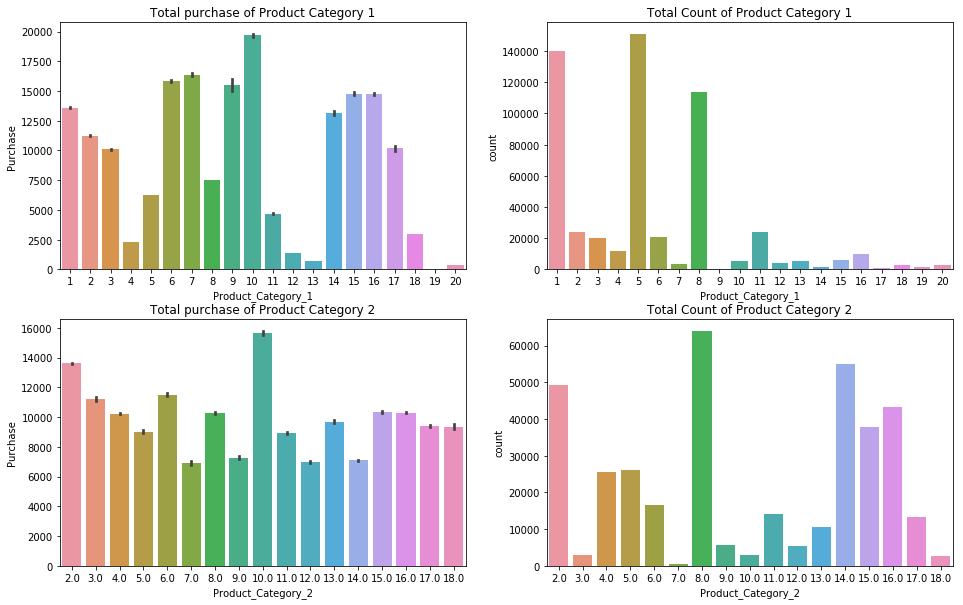

In [0]:
plt.figure(1)
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.barplot(train.Product_Category_1,train.Purchase)
plt.title('Total purchase of Product Category 1')

plt.subplot(222)
sns.countplot(train.Product_Category_1)
plt.title('Total Count of Product Category 1')

plt.subplot(223)
sns.barplot(train.Product_Category_2,train.Purchase)
plt.title('Total purchase of Product Category 2')

plt.subplot(224)
sns.countplot(train.Product_Category_2)
plt.title('Total Count of Product Category 2')



*   Class 4, 11, 12, 13, 18, 19 and 20 has very Less sales as compared to the rest of Groups.

*   Remaining groups are showing good purchase numbers hence can be retained in the store for long.



Text(0.5, 1.0, 'Total Count of Married and Singles')

<Figure size 432x288 with 0 Axes>

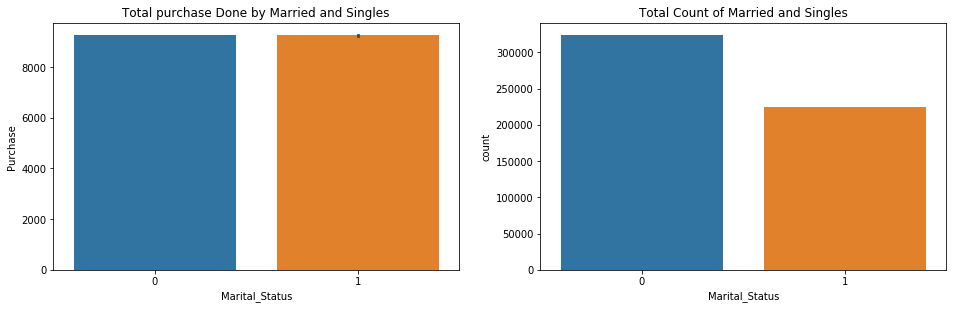

In [0]:
plt.figure(1)
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.barplot(train.Marital_Status,train.Purchase)
plt.title('Total purchase Done by Married and Singles')

plt.subplot(222)
sns.countplot(train.Marital_Status)
plt.title('Total Count of Married and Singles')



*   Number of Singles are more than the married ones.

*   Though the Contribution of both the classes are same.



Text(0.5, 1.0, 'Total Count of Different Age groups')

<Figure size 432x288 with 0 Axes>

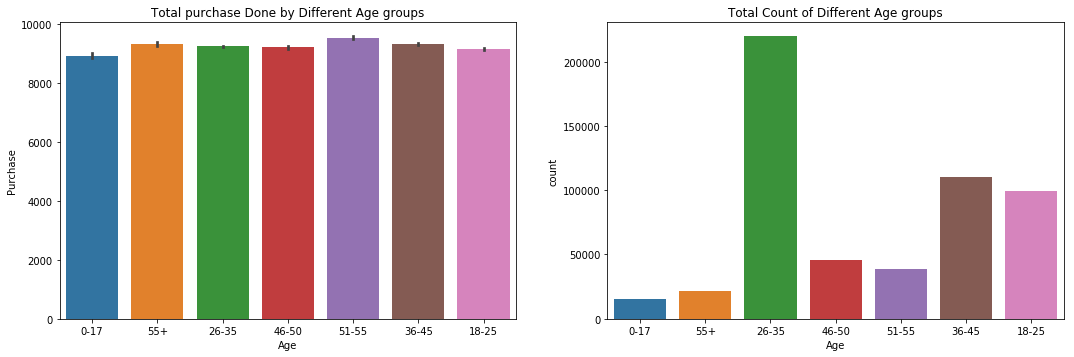

In [0]:
plt.figure(1)
plt.figure(figsize=(18,12))

plt.subplot(221)
sns.barplot(train.Age,train.Purchase)
plt.title('Total purchase Done by Different Age groups')

plt.subplot(222)
sns.countplot(train.Age)
plt.title('Total Count of Different Age groups')



*   The Most Active Purchasers belong to the Young age groups i.e. 26-35 where the people generally gets married and the requirement for survivals increases too.


*   The same group is then followed by the age group 36-45.


*   18-25 class consists of majorly Students or migrants from other places migrated for studying.



Text(0.5, 1.0, 'Gender wise Bifurcation of the Age Group')

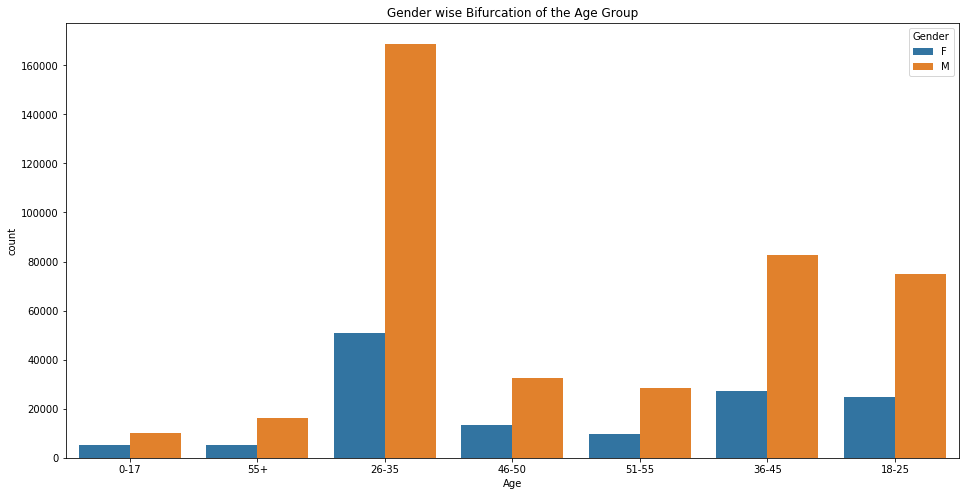

In [0]:
plt.figure(figsize=(16,8))
sns.countplot(train.Age, hue=train.Gender)
plt.title('Gender wise Bifurcation of the Age Group')

In All the Age groups the dominent purchaser is the male.

This can be because of the breadearner role in the family, that they purchase more dominently as compare to the Femaless.

Text(0.5, 1.0, 'Total Count of Customers in Different City')

<Figure size 432x288 with 0 Axes>

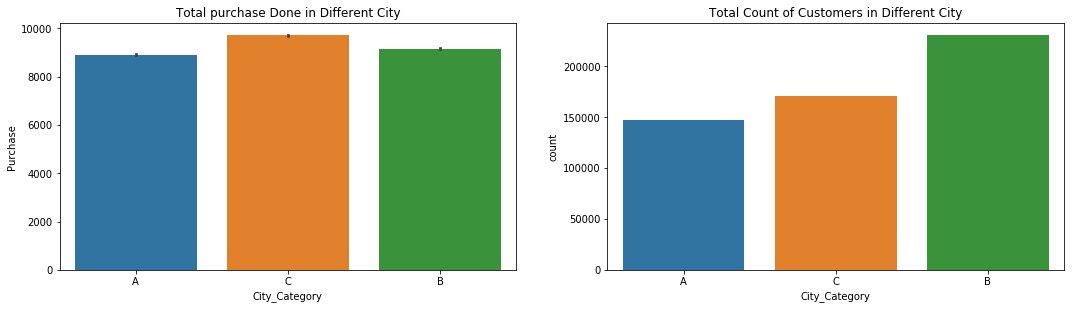

In [0]:
plt.figure(1)
plt.figure(figsize=(18,10))

plt.subplot(221)
sns.barplot(train.City_Category,train.Purchase)
plt.title('Total purchase Done in Different City')

plt.subplot(222)
sns.countplot(train.City_Category)
plt.title('Total Count of Customers in Different City')

*  The Sales in all the 3 city types are very close to each others.


*   All the city categories are giving good revenue to the store. Hence the same can be retained and can think of adding more stores in these cities.

In [0]:
print(pd.crosstab(train.City_Category,train.Age))

Age            0-17  18-25  26-35  36-45  46-50  51-55    55+
City_Category                                                
A              2544  27535  73745  26617   7607   6099   3573
B              5435  43247  91584  47598  20406  17741   5162
C              7123  28878  54258  35798  17688  14661  12769


In [0]:
print(pd.crosstab(train.City_Category,train.Stay_In_Current_City_Years))

Stay_In_Current_City_Years      0      1      2      3     4+
City_Category                                                
A                           24178  49305  27114  24804  22319
B                           28687  83413  41772  42691  34610
C                           21533  61103  32952  27790  27797


# Data Preparation



*   Two variables in the dataset have missing values which can lead to problem in training of the model. 

*   These variables are Product_category_2 and Product_category_3.

*   Product_category_2 consist of around 30% to 32% of missing values while Product_category_3 contains approx 70 % of missing values.

*   We will drop Product Category 3 since it contains missing values more than 69 %. and will have to impute mean value in the missing places of Product_category_2.





In [0]:
print(train['Product_Category_2'].mean())
print(train['Product_Category_3'].mean())
print(test['Product_Category_2'].mean())
print(test['Product_Category_3'].mean())

9.842329251122386
12.668243206790512
9.849586059346997
12.669453946534905


In [0]:
train['Product_Category_2'].fillna(10,inplace=True)
test['Product_Category_2'].fillna(10,inplace=True)


*   The Dataset consists of 12 Variables from which 5 are categorical and rest are Numeric.



*   The Categorical variables Age and Stay_in_current Year will be label encoded since these variable consists of ordinal Data. Hence on Ordinal data Label encoding is preferred.



*   The remaining Categorical variables i.e. Gender, City_category will be dummified or one hot encoded. This will convert the string vategories into numeric category and feisable for training.


In [0]:
train.Age = train.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
test.Age = test.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [0]:
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.map({'4+':4,'1':1,'2':2,'0':0,'3':3})
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.map({'4+':4,'1':1,'2':2,'0':0,'3':3})

In [0]:
dtrain = pd.get_dummies(train,columns=['Gender', 'City_Category'])
dtest = pd.get_dummies(test,columns=['Gender', 'City_Category'])

In [0]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,10.0,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,10.0,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4,0,8,10.0,NaN,7969


We Will Drop The Variables with Null Values

In [0]:
dtrain = dtrain.drop(['Product_Category_2','Product_Category_3'],1)
dtest = dtest.drop(['Product_Category_2','Product_Category_3'],1)

In [0]:
dtrain.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,10,2,0,3,8370,1,0,1,0,0
1,1000001,P00248942,0,10,2,0,1,15200,1,0,1,0,0
2,1000001,P00087842,0,10,2,0,12,1422,1,0,1,0,0
3,1000001,P00085442,0,10,2,0,12,1057,1,0,1,0,0
4,1000002,P00285442,6,16,4,0,8,7969,0,1,0,0,1


In [0]:
print('Train shape : ', train.shape)
print('Test shape : ', test.shape)
print('Dummy Train shape : ', dtrain.shape)
print('Dummy Test shape : ', dtest.shape)

Train shape :  (550068, 12)
Test shape :  (233599, 11)
Dummy Train shape :  (550068, 13)
Dummy Test shape :  (233599, 12)


# DATA MODELLING

The Final Dataset with dummy variables and dropped variables will be now split into training and  Testing set. 

Since the Test data is already Given to us we will Consider the same as data for test and the train data for training.

While training the data we will remove USER_ID and Product_ID as there is no major role in the prediction of the target variables.

In [0]:
xtrain = dtrain.drop(['Purchase','User_ID','Product_ID'],1)
ytrain = dtrain.Purchase
xtest = dtest.drop(['User_ID','Product_ID'],1)

All the algorithems applicables will be imported and then will be fitted over the training data.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [0]:
lin = LinearRegression()
las = Lasso()
rid = Ridge()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
X = XGBRegressor()

In [0]:
lin_pred = lin.fit(xtrain,ytrain).predict(xtest)

In [0]:
solution = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':lin_pred})
solution.to_csv('Black_friday_solution.csv',index=False)

## RMSE - 4702

In [0]:
dt_pred = dt.fit(xtrain,ytrain).predict(xtest)

In [0]:
solution2 = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':dt_pred})
solution2.to_csv('Black_friday_Dtreen.csv',index=False)

## RMSE - 2965

In [0]:
rf_pred = rf.fit(xtrain,ytrain).predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
solution1 = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':rf_pred})
solution1.to_csv('Black_friday_random_forest.csv',index=False)

## RMSE - 2950

In [0]:
xpred = X.fit(xtrain,ytrain).predict(xtest)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[07:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
solution4 = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':xpred})
solution4.to_csv('Black_friday_XG.csv',index=False)

## RMSE - 3055

In [0]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


rid = Ridge()

scoring = 'neg_mean_squared_error'
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = rid, 
                        param_grid = params, 
                        scoring= scoring, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(xtrain, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   21.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [0]:
model_cv.best_params_

{'alpha': 1000}

In [0]:
Rid = Ridge(alpha=1000)
Rid.fit(xtrain,ytrain)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
pred_rid = Rid.predict(xtest)

In [0]:
solution4 = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':pred_rid})
solution4.to_csv('Black_friday_Ridge.csv',index=False)

## RMSE = 4694

# Concluion

After Fitting and training with algorithems like Linear Regression, Ridge Regression, Decieion Tree Regressor, Random Forest Regressor and XG boost regressor we recieved different Root mean square error from all the models.

The most dominent estimators were the Product_category_1, Occupation of the person and the Term for which the person has been staying in the city.

The Best Fitted Model was turned out to Be Random Forest which gave the Least RMSE i.e. 2950.

In [0]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf.feature_importances_

array([0.01737573, 0.03042735, 0.02104173, 0.0080452 , 0.90679872,
       0.00352656, 0.00355375, 0.00222454, 0.00236413, 0.0046423 ])

In [0]:
a= pd.DataFrame({'Features':xtrain.columns,'Importance':rf.feature_importances_})

In [0]:
a.sort_values(by='Importance',ascending=False)

,Features,Importance
4,Product_Category_1,0.906799
1,Occupation,0.030427
2,Stay_In_Current_City_Years,0.021042
0,Age,0.017376
3,Marital_Status,0.008045
9,City_Category_C,0.004642
6,Gender_M,0.003554
5,Gender_F,0.003527
8,City_Category_B,0.002364
7,City_Category_A,0.002225
